In [ ]:
#Import library yang dibutuhkan

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist,pdist
from sklearn.preprocessing import RobustScaler

In [ ]:
#Load dataset dan menampilkannya

data = pd.read_csv('Credit Card Customer Data.csv')
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [ ]:
#Mendefinisikan X adalah Avg_Credit_Limit dan Total_Credit_Cards

X = data.drop(['Sl_No', 'Customer Key','Total_visits_bank','Total_visits_online','Total_calls_made'],axis=1)

In [ ]:
#Metode Elbow

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, random_state = 2023)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Cluster Sum Square')

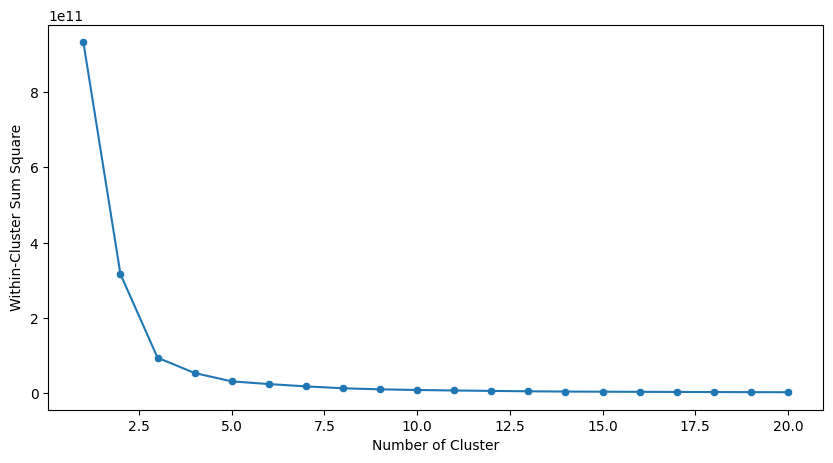

In [ ]:
#Visualisasi grafik elbow

plt.figure(figsize=(10,5))
n = range(1,21)
sns.lineplot(
    x = n,
    y = wcss
)
sns.scatterplot(
    x=n,
    y=wcss
)
plt.xticks = n
plt.xlabel('Number of Cluster')
plt.ylabel('Within-Cluster Sum Square')

In [ ]:
#K-Means menggunakan cluster optimal dari Metode Elbow

kmean = KMeans(n_clusters=3)
kmean.fit(X)

data['Cluster'] = kmean.labels_

In [ ]:
#Metode Silhouette

silhouette_scores = []
number_of_cluster = range(2,21)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean'))

Text(0, 0.5, 'Silhoutte Score')

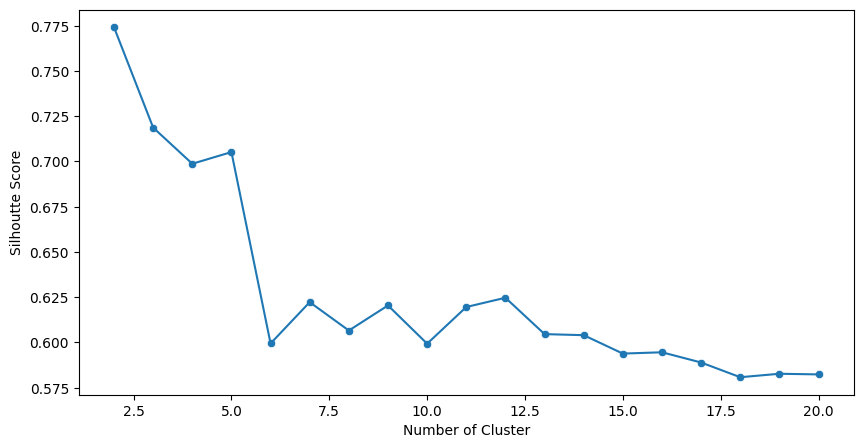

In [ ]:
#Visualisasi grafik silhouette

plt.figure(figsize=(10,5))
sns.lineplot(
    x = range(2,21),
    y = silhouette_scores
)
sns.scatterplot(
    x=range(2,21),
    y=silhouette_scores
)
plt.xticks = range(2,21)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')

In [ ]:
#K-Means menggunakan cluster optimal dari Metode Silhouette

kmean = KMeans(n_clusters=2)
kmean.fit(X)

data['Cluster'] = kmean.labels_
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,1
656,657,60732,84000,10,1,13,2,0
657,658,53834,145000,8,1,9,1,1
658,659,80655,172000,10,1,15,0,1
